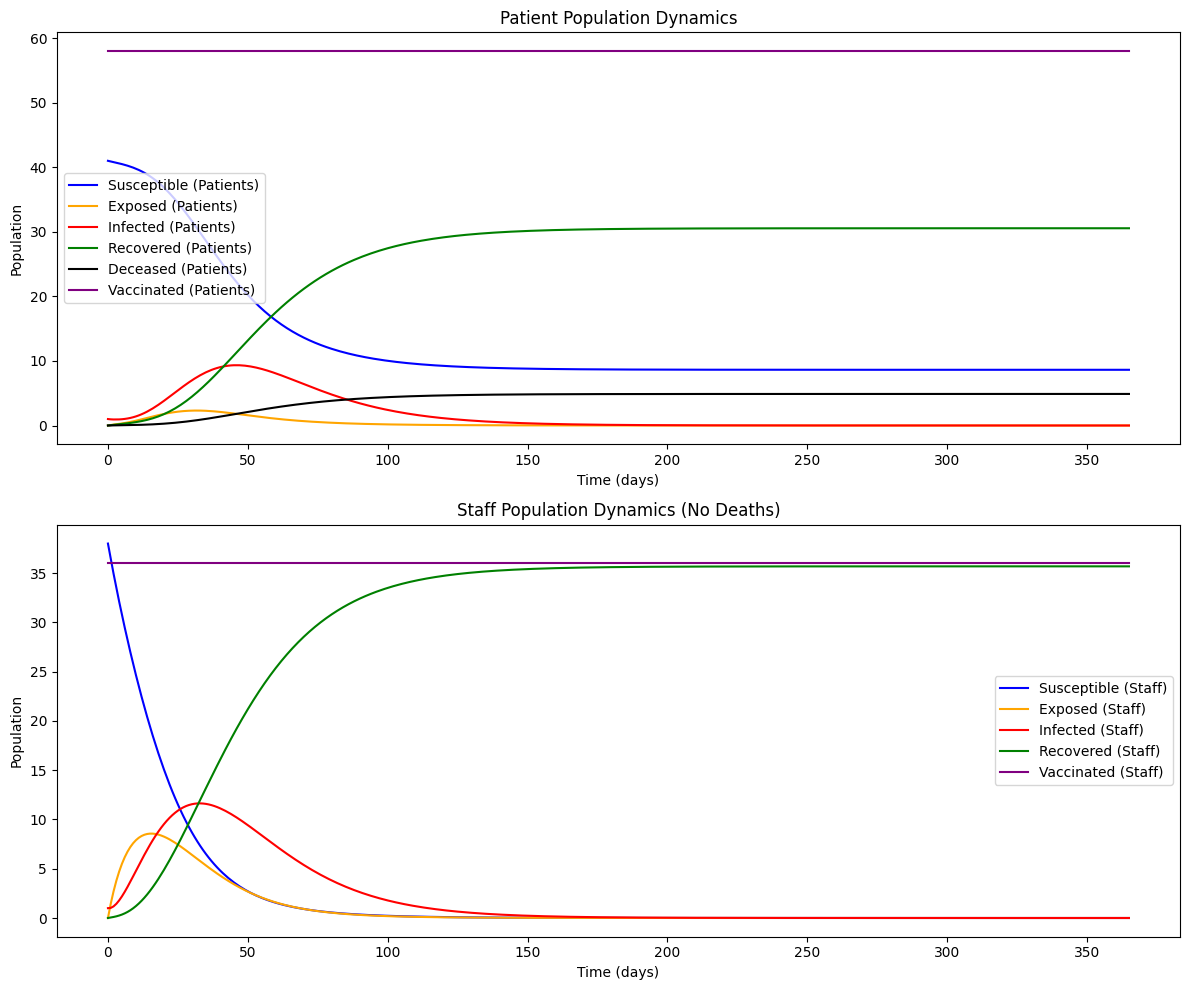

   Time        S_p       E_p       I_p       R_p       D_p   V_p        S_s  \
0   0.0  41.000000  0.000000  1.000000  0.000000  0.000000  58.0  38.000000   
1   1.0  40.899818  0.077236  0.955574  0.048782  0.007805  58.0  36.442734   
2   2.0  40.801700  0.138487  0.933487  0.095927  0.015348  58.0  34.947370   
3   3.0  40.702408  0.194555  0.929529  0.142432  0.022789  58.0  33.507219   
4   4.0  40.599254  0.252136  0.942234  0.189157  0.030265  58.0  32.117151   

        E_s       I_s       R_s   V_s  
0  0.000000  1.000000  0.000000  36.0  
1  1.448830  1.024175  0.050006  36.0  
2  2.701614  1.178648  0.104587  36.0  
3  3.781484  1.439108  0.169635  36.0  
4  4.708452  1.784526  0.249912  36.0  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Base, as indicated in data

# Define the system of differential equations for the extended SEIR model
def seir_model(y, t, beta_p, beta_s, beta_pp, beta_ss, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext, delta_p, nu_p, nu_s, N_p, N_s):
    S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = y
    
    # Differential equations for patients and staff with deaths and vaccinations
    dS_p = -beta_p * S_p * I_s / N_p - beta_s * S_p * I_p / N_p - beta_pp * S_p * I_p / N_p - nu_p * S_p
    dE_p = beta_pp * S_p * I_s / N_p + beta_s * S_p * I_p / N_p - sigma_p * E_p
    dI_p = sigma_p * E_p - gamma_p * I_p - delta_p * I_p
    dR_p = gamma_p * I_p
    dD_p = delta_p * I_p  # Deaths from infection (patients)
    dV_p = nu_p * S_p  # Vaccination rate
    
    dS_s = -beta_p * S_s * I_p / N_s - beta_s * S_s * I_s / N_s - beta_ss * S_s * I_p / N_s - nu_s * S_s - lambda_ext * S_s
    dE_s = beta_p * S_s * I_p / N_s + beta_ss * S_s * I_s / N_s - sigma_s * E_s + lambda_ext * S_s
    dI_s = sigma_s * E_s - gamma_s * I_s
    dR_s = gamma_s * I_s
    dV_s = nu_s * S_s  # Vaccination rate
    
    # Return the derivatives as a list
    return [dS_p, dE_p, dI_p, dR_p, dD_p, dV_p, dS_s, dE_s, dI_s, dR_s, dV_s]

# Initial conditions (number of individuals in each compartment)
S_p0 = 41  # Initial susceptible patients
E_p0 = 0    # Initial exposed patients
I_p0 = 1    # Initial infected patients
R_p0 = 0    # Initial recovered patients
D_p0 = 0    # Initial deceased patients
V_p0 = 58    # Initial vaccinated patients

S_s0 = 38   # Initial susceptible staff
E_s0 = 0    # Initial exposed staff
I_s0 = 1    # Initial infected staff
R_s0 = 0    # Initial recovered staff
V_s0 = 36    # Initial vaccinated staff

# Combine the initial conditions into a vector
y0 = [S_p0, E_p0, I_p0, R_p0, D_p0, V_p0, S_s0, E_s0, I_s0, R_s0, V_s0]

# Parameters
beta_p = 0.03  # Infection rate from patients to staff
beta_s = 0.07  # Infection rate from staff to patients
beta_pp = 0.15 # patient-to-patient
beta_ss = 0.04 # staff-to-staff
gamma_p = 0.05  # Recovery rate for patients
gamma_s = 0.05  # Recovery rate for staff
sigma_p = 0.3  # Rate of transition from exposed to infected (patients)
sigma_s = 0.1  # Rate of transition from exposed to infected (staff)
lambda_ext = 0.04  #External rate of transition from exposed to infected
delta_p = 0.008  # Death rate for patients (e.g., 1% of infected patients die)
nu_p = 0.00  # Vaccination rate for patients (5% of susceptible patients get vaccinated per day)
nu_s = 0.00  # Vaccination rate for staff (5% of susceptible staff get vaccinated per day)

N_p = S_p0 + E_p0 + I_p0 + R_p0 + D_p0 + V_p0  # Total number of patients
N_s = S_s0 + E_s0 + I_s0 + R_s0 + V_s0  # Total number of staff

# Time points (from 0 to 100 days)
t = np.linspace(0, 365, 366)

# Solve the differential equations using odeint
result = odeint(seir_model, y0, t, args=(beta_p, beta_s, beta_pp, beta_ss, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext, delta_p, nu_p, nu_s, N_p, N_s))

# Extract the results
S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = result.T

# Plot the results
plt.figure(figsize=(12, 10))

# Plot for patients
plt.subplot(2, 1, 1)
plt.plot(t, S_p, label='Susceptible (Patients)', color='blue')
plt.plot(t, E_p, label='Exposed (Patients)', color='orange')
plt.plot(t, I_p, label='Infected (Patients)', color='red')
plt.plot(t, R_p, label='Recovered (Patients)', color='green')
plt.plot(t, D_p, label='Deceased (Patients)', color='black')
plt.plot(t, V_p, label='Vaccinated (Patients)', color='purple')
plt.title("Patient Population Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Plot for staff
plt.subplot(2, 1, 2)
plt.plot(t, S_s, label='Susceptible (Staff)', color='blue')
plt.plot(t, E_s, label='Exposed (Staff)', color='orange')
plt.plot(t, I_s, label='Infected (Staff)', color='red')
plt.plot(t, R_s, label='Recovered (Staff)', color='green')
plt.plot(t, V_s, label='Vaccinated (Staff)', color='purple')
plt.title("Staff Population Dynamics (No Deaths)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Show the plots
plt.tight_layout()
#plt.savefig('seir_res_staff_original.pdf')
#plt.savefig('seir_res_staff_original.png')
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'S_p': S_p, 'E_p': E_p, 'I_p': I_p, 'R_p': R_p, 'D_p': D_p, 'V_p': V_p,  # Patient compartments
    'S_s': S_s, 'E_s': E_s, 'I_s': I_s, 'R_s': R_s, 'V_s': V_s  # Staff compartments
})

# Show the DataFrame
print(df.head())  # Show the first few rows to check the data

In [10]:
#Total numbers
print(f"Totals after 1 Year:\n")

E_p = result[:, 1]
I_p = result[:, 2]
R_p = result[:, 3]
D_p = result[:, 4]
cumulative_infections_p = E_p + I_p + R_p + D_p
cum_p = cumulative_infections_p[-1]
print(f"Total Cumulative Patient Infections: {cum_p:.0f}")

E_s = result[:, 7]
I_s = result[:, 8]
R_s = result[:, 9]
cumulative_infections_s = E_s + I_s + R_s
cum_s = cumulative_infections_s[-1]
print(f"Total Cumulative Staff Infections: {cum_s:.0f}")

total_d = round(D_p[-1])
print(f"Total Deaths: {total_d}")

total_r_p = round(R_p[-1])
print(f"Total Patient Recoveries: {total_r_p}")

total_r_s = round(R_s[-1])
print(f"Total Staff Recoveries: {total_r_s}")

total_v_p = round(V_p[-1])
print(f"Total Patient Vaccinations: {total_v_p}")

total_v_s = round(V_s[-1])
print(f"Total Staff Vaccinations: {total_v_s}")

Totals after 1 Year:

Total Cumulative Patient Infections: 35
Total Cumulative Staff Infections: 36
Total Deaths: 5
Total Patient Recoveries: 31
Total Staff Recoveries: 36
Total Patient Vaccinations: 58
Total Staff Vaccinations: 36


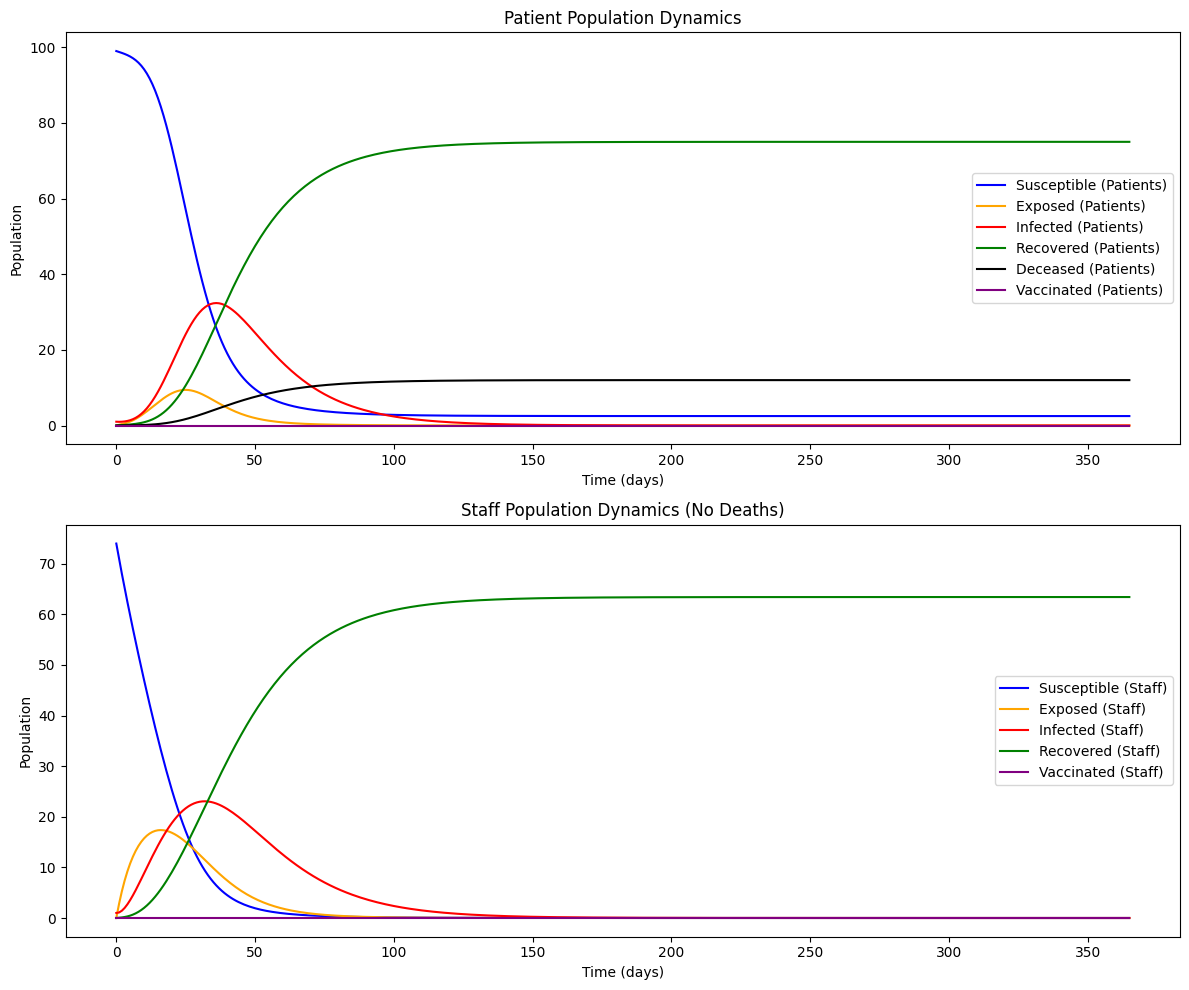

   Time        S_p       E_p       I_p       R_p       D_p  V_p        S_s  \
0   0.0  99.000000  0.000000  1.000000  0.000000  0.000000  0.0  74.000000   
1   1.0  98.756131  0.190095  0.972717  0.049075  0.007852  0.0  70.965492   
2   2.0  98.506287  0.359867  0.998252  0.098144  0.015703  0.0  68.041239   
3   3.0  98.232911  0.546295  1.073597  0.149726  0.023956  0.0  65.206952   
4   4.0  97.919559  0.771070  1.204293  0.206424  0.033028  0.0  62.447680   

        E_s       I_s       R_s  V_s  
0  0.000000  1.000000  0.000000  0.0  
1  2.822422  1.093307  0.051177  0.0  
2  5.268219  1.438418  0.113523  0.0  
3  7.385419  1.988748  0.198435  0.0  
4  9.214345  2.704274  0.315148  0.0  


In [2]:
# No vaccination

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Base, as indicated in data

# Define the system of differential equations for the extended SEIR model
def seir_model(y, t, beta_p, beta_s, beta_pp, beta_ss, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext, delta_p, nu_p, nu_s, N_p, N_s):
    S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = y
    
    # Differential equations for patients and staff with deaths and vaccinations
    dS_p = -beta_p * S_p * I_s / N_p - beta_s * S_p * I_p / N_p - beta_pp * S_p * I_p / N_p - nu_p * S_p
    dE_p = beta_pp * S_p * I_s / N_p + beta_s * S_p * I_p / N_p - sigma_p * E_p
    dI_p = sigma_p * E_p - gamma_p * I_p - delta_p * I_p
    dR_p = gamma_p * I_p
    dD_p = delta_p * I_p  # Deaths from infection (patients)
    dV_p = nu_p * S_p  # Vaccination rate
    
    dS_s = -beta_p * S_s * I_p / N_s - beta_s * S_s * I_s / N_s - beta_ss * S_s * I_p / N_s - nu_s * S_s - lambda_ext * S_s
    dE_s = beta_p * S_s * I_p / N_s + beta_ss * S_s * I_s / N_s - sigma_s * E_s + lambda_ext * S_s
    dI_s = sigma_s * E_s - gamma_s * I_s
    dR_s = gamma_s * I_s
    dV_s = nu_s * S_s  # Vaccination rate
    
    # Return the derivatives as a list
    return [dS_p, dE_p, dI_p, dR_p, dD_p, dV_p, dS_s, dE_s, dI_s, dR_s, dV_s]

# Initial conditions (number of individuals in each compartment)
S_p0 = 41+58  # Initial susceptible patients
E_p0 = 0    # Initial exposed patients
I_p0 = 1    # Initial infected patients
R_p0 = 0    # Initial recovered patients
D_p0 = 0    # Initial deceased patients
V_p0 = 0    # Initial vaccinated patients

S_s0 = 38+36   # Initial susceptible staff
E_s0 = 0    # Initial exposed staff
I_s0 = 1    # Initial infected staff
R_s0 = 0    # Initial recovered staff
V_s0 = 0    # Initial vaccinated staff

# Combine the initial conditions into a vector
y0 = [S_p0, E_p0, I_p0, R_p0, D_p0, V_p0, S_s0, E_s0, I_s0, R_s0, V_s0]

# Parameters
beta_p = 0.03  # Infection rate from patients to staff
beta_s = 0.07  # Infection rate from staff to patients
beta_pp = 0.15 # patient-to-patient
beta_ss = 0.04 # staff-to-staff
gamma_p = 0.05  # Recovery rate for patients
gamma_s = 0.05  # Recovery rate for staff
sigma_p = 0.3  # Rate of transition from exposed to infected (patients)
sigma_s = 0.1  # Rate of transition from exposed to infected (staff)
lambda_ext = 0.04  #External rate of transition from exposed to infected
delta_p = 0.008  # Death rate for patients (e.g., 1% of infected patients die)
nu_p = 0.00  # Vaccination rate for patients (5% of susceptible patients get vaccinated per day)
nu_s = 0.00  # Vaccination rate for staff (5% of susceptible staff get vaccinated per day)

N_p = S_p0 + E_p0 + I_p0 + R_p0 + D_p0 + V_p0  # Total number of patients
N_s = S_s0 + E_s0 + I_s0 + R_s0 + V_s0  # Total number of staff

# Time points (from 0 to 100 days)
t = np.linspace(0, 365, 366)

# Solve the differential equations using odeint
result = odeint(seir_model, y0, t, args=(beta_p, beta_s, beta_pp, beta_ss, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext, delta_p, nu_p, nu_s, N_p, N_s))

# Extract the results
S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = result.T

# Plot the results
plt.figure(figsize=(12, 10))

# Plot for patients
plt.subplot(2, 1, 1)
plt.plot(t, S_p, label='Susceptible (Patients)', color='blue')
plt.plot(t, E_p, label='Exposed (Patients)', color='orange')
plt.plot(t, I_p, label='Infected (Patients)', color='red')
plt.plot(t, R_p, label='Recovered (Patients)', color='green')
plt.plot(t, D_p, label='Deceased (Patients)', color='black')
plt.plot(t, V_p, label='Vaccinated (Patients)', color='purple')
plt.title("Patient Population Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Plot for staff
plt.subplot(2, 1, 2)
plt.plot(t, S_s, label='Susceptible (Staff)', color='blue')
plt.plot(t, E_s, label='Exposed (Staff)', color='orange')
plt.plot(t, I_s, label='Infected (Staff)', color='red')
plt.plot(t, R_s, label='Recovered (Staff)', color='green')
plt.plot(t, V_s, label='Vaccinated (Staff)', color='purple')
plt.title("Staff Population Dynamics (No Deaths)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Show the plots
plt.tight_layout()
plt.savefig('seir_res_staff_none.png')
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'S_p': S_p, 'E_p': E_p, 'I_p': I_p, 'R_p': R_p, 'D_p': D_p, 'V_p': V_p,  # Patient compartments
    'S_s': S_s, 'E_s': E_s, 'I_s': I_s, 'R_s': R_s, 'V_s': V_s  # Staff compartments
})

# Show the DataFrame
print(df.head())  # Show the first few rows to check the data

In [16]:
#Total numbers
print(f"Totals after 1 Year (No Vaccination):\n")

E_p = result[:, 1]
I_p = result[:, 2]
R_p = result[:, 3]
D_p = result[:, 4]
cumulative_infections_p = E_p + I_p + R_p + D_p
cum_p = cumulative_infections_p[-1]
print(f"Total Cumulative Patient Infections: {cum_p:.0f}")

E_s = result[:, 7]
I_s = result[:, 8]
R_s = result[:, 9]
cumulative_infections_s = E_s + I_s + R_s
cum_s = cumulative_infections_s[-1]
print(f"Total Cumulative Staff Infections: {cum_s:.0f}")

total_d = round(D_p[-1])
print(f"Total Deaths: {total_d}")

total_r_p = round(R_p[-1])
print(f"Total Patient Recoveries: {total_r_p}")

total_r_s = round(R_s[-1])
print(f"Total Staff Recoveries: {total_r_s}")

total_v_p = round(V_p[-1])
print(f"Total Patient Vaccinations: {total_v_p}")

total_v_s = round(V_s[-1])
print(f"Total Staff Vaccinations: {total_v_s}")

Totals after 1 Year (No Vaccination):

Total Cumulative Patient Infections: 87
Total Cumulative Staff Infections: 63
Total Deaths: 12
Total Patient Recoveries: 75
Total Staff Recoveries: 63
Total Patient Vaccinations: 0
Total Staff Vaccinations: 0


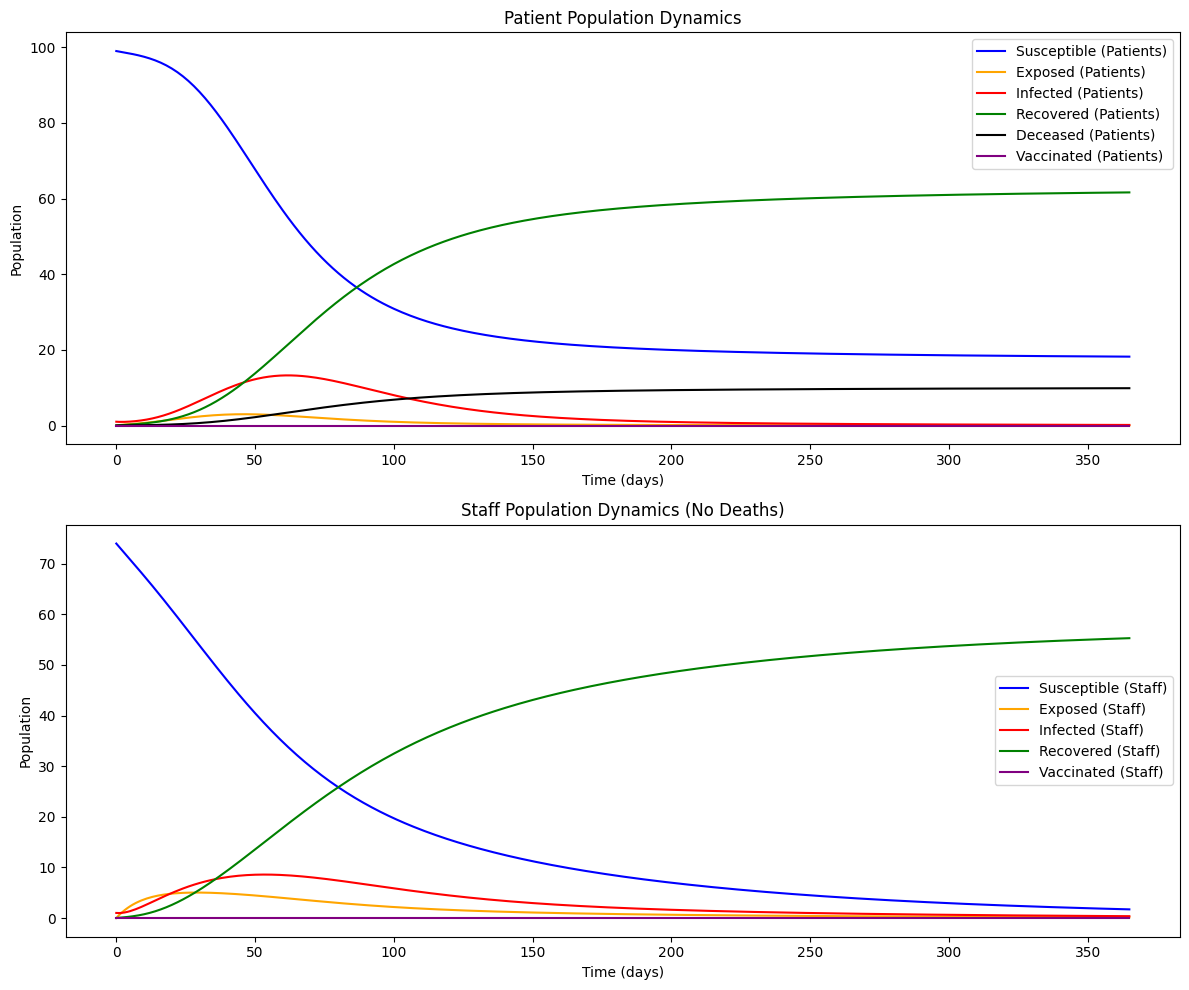

   Time        S_p       E_p       I_p       R_p       D_p  V_p        S_s  \
0   0.0  99.000000  0.000000  1.000000  0.000000  0.000000  0.0  74.000000   
1   1.0  98.866503  0.110793  0.960843  0.048874  0.007820  0.0  73.356489   
2   2.0  98.736183  0.192604  0.951564  0.096580  0.015453  0.0  72.718580   
3   3.0  98.605426  0.257653  0.963945  0.144389  0.023102  0.0  72.083870   
4   4.0  98.471511  0.314162  0.993169  0.193254  0.030921  0.0  71.450434   

        E_s       I_s       R_s  V_s  
0  0.000000  1.000000  0.000000  0.0  
1  0.573714  0.979955  0.049256  0.0  
2  1.087776  1.013861  0.098894  0.0  
3  1.548403  1.093581  0.151405  0.0  
4  1.961098  1.211943  0.208896  0.0  


In [3]:
# No vaccination, social distancing

# Define the system of differential equations for the extended SEIR model
def seir_model(y, t, beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s):
    S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = y
    
    # Differential equations for patients and staff with deaths and vaccinations
    dS_p = -beta_p_u * S_p * I_s / N_p - beta_s_u * S_p * I_p / N_p - beta_pp_u * S_p * I_p / N_p - nu_p * S_p
    dE_p = beta_pp_u * S_p * I_s / N_p + beta_s_u * S_p * I_p / N_p - sigma_p * E_p
    dI_p = sigma_p * E_p - gamma_p * I_p - delta_p * I_p
    dR_p = gamma_p * I_p
    dD_p = delta_p * I_p  # Deaths from infection (patients)
    dV_p = nu_p * S_p  # Vaccination rate
    
    dS_s = -beta_p_u * S_s * I_p / N_s - beta_s_u * S_s * I_s / N_s - beta_ss_u * S_s * I_p / N_s - nu_s * S_s - lambda_ext_u * S_s
    dE_s = beta_p_u * S_s * I_p / N_s + beta_ss_u * S_s * I_s / N_s - sigma_s * E_s + lambda_ext_u * S_s
    dI_s = sigma_s * E_s - gamma_s * I_s
    dR_s = gamma_s * I_s
    dV_s = nu_s * S_s  # Vaccination rate
    
    # Return the derivatives as a list
    return [dS_p, dE_p, dI_p, dR_p, dD_p, dV_p, dS_s, dE_s, dI_s, dR_s, dV_s]

# Initial conditions (number of individuals in each compartment)
S_p0 = 41+58  # Initial susceptible patients
E_p0 = 0    # Initial exposed patients
I_p0 = 1    # Initial infected patients
R_p0 = 0    # Initial recovered patients
D_p0 = 0    # Initial deceased patients
V_p0 = 0    # Initial vaccinated patients

S_s0 = 38+36   # Initial susceptible staff
E_s0 = 0    # Initial exposed staff
I_s0 = 1    # Initial infected staff
R_s0 = 0    # Initial recovered staff
V_s0 = 0    # Initial vaccinated staff

# Combine the initial conditions into a vector
y0 = [S_p0, E_p0, I_p0, R_p0, D_p0, V_p0, S_s0, E_s0, I_s0, R_s0, V_s0]

# Parameters
beta_p = 0.03  # Infection rate from patients to staff
beta_s = 0.07  # Infection rate from staff to patients
beta_pp = 0.15 # patient-to-patient
beta_ss = 0.04 # staff-to-staff
gamma_p = 0.05  # Recovery rate for patients
gamma_s = 0.05  # Recovery rate for staff
sigma_p = 0.3  # Rate of transition from exposed to infected (patients)
sigma_s = 0.1  # Rate of transition from exposed to infected (staff)
lambda_ext = 0.04  #External rate of transition from exposed to infected
delta_p = 0.008  # Death rate for patients (e.g., 1% of infected patients die)
nu_p = 0.00  # Vaccination rate for patients (5% of susceptible patients get vaccinated per day)
nu_s = 0.00  # Vaccination rate for staff (5% of susceptible staff get vaccinated per day)

#Control parameter to model social distancing/quarantine
u = 0.4
u_ss = 0.8
beta_p_u = (1 - u_ss) * beta_p
beta_s_u = (1 - u) * beta_s
beta_pp_u = (1 - u) * beta_pp
beta_ss_u = (1 - u_ss) * beta_ss
lambda_ext_u = (1 - u_ss) * lambda_ext

N_p = S_p0 + E_p0 + I_p0 + R_p0 + D_p0 + V_p0  # Total number of patients
N_s = S_s0 + E_s0 + I_s0 + R_s0 + V_s0  # Total number of staff

# Time points (from 0 to 100 days)
t = np.linspace(0, 365, 366)

# Solve the differential equations using odeint
result = odeint(seir_model, y0, t, args=(beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s))

# Extract the results
S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = result.T

# Plot the results
plt.figure(figsize=(12, 10))

# Plot for patients
plt.subplot(2, 1, 1)
plt.plot(t, S_p, label='Susceptible (Patients)', color='blue')
plt.plot(t, E_p, label='Exposed (Patients)', color='orange')
plt.plot(t, I_p, label='Infected (Patients)', color='red')
plt.plot(t, R_p, label='Recovered (Patients)', color='green')
plt.plot(t, D_p, label='Deceased (Patients)', color='black')
plt.plot(t, V_p, label='Vaccinated (Patients)', color='purple')
plt.title("Patient Population Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Plot for staff
plt.subplot(2, 1, 2)
plt.plot(t, S_s, label='Susceptible (Staff)', color='blue')
plt.plot(t, E_s, label='Exposed (Staff)', color='orange')
plt.plot(t, I_s, label='Infected (Staff)', color='red')
plt.plot(t, R_s, label='Recovered (Staff)', color='green')
plt.plot(t, V_s, label='Vaccinated (Staff)', color='purple')
plt.title("Staff Population Dynamics (No Deaths)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Show the plots
plt.tight_layout()
plt.savefig('seir_res_staff_sd.png')
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'S_p': S_p, 'E_p': E_p, 'I_p': I_p, 'R_p': R_p, 'D_p': D_p, 'V_p': V_p,  # Patient compartments
    'S_s': S_s, 'E_s': E_s, 'I_s': I_s, 'R_s': R_s, 'V_s': V_s  # Staff compartments
})

# Show the DataFrame
print(df.head())  # Show the first few rows to check the data

In [41]:
#Total numbers
print(f"Totals after 1 Year (Social Distancing, No Vaccination):\n")

E_p = result[:, 1]
I_p = result[:, 2]
R_p = result[:, 3]
D_p = result[:, 4]
cumulative_infections_p = E_p + I_p + R_p + D_p
cum_p = cumulative_infections_p[-1]
print(f"Total Cumulative Patient Infections: {cum_p:.0f}")

E_s = result[:, 7]
I_s = result[:, 8]
R_s = result[:, 9]
cumulative_infections_s = E_s + I_s + R_s
cum_s = cumulative_infections_s[-1]
print(f"Total Cumulative Staff Infections: {cum_s:.0f}")

total_d = round(D_p[-1])
print(f"Total Deaths: {total_d}")

total_r_p = round(R_p[-1])
print(f"Total Patient Recoveries: {total_r_p}")

total_r_s = round(R_s[-1])
print(f"Total Staff Recoveries: {total_r_s}")

total_v_p = round(V_p[-1])
print(f"Total Patient Vaccinations: {total_v_p}")

total_v_s = round(V_s[-1])
print(f"Total Staff Vaccinations: {total_v_s}")

Totals after 1 Year (Social Distancing, No Vaccination):

Total Cumulative Patient Infections: 72
Total Cumulative Staff Infections: 56
Total Deaths: 10
Total Patient Recoveries: 62
Total Staff Recoveries: 55
Total Patient Vaccinations: 0
Total Staff Vaccinations: 0


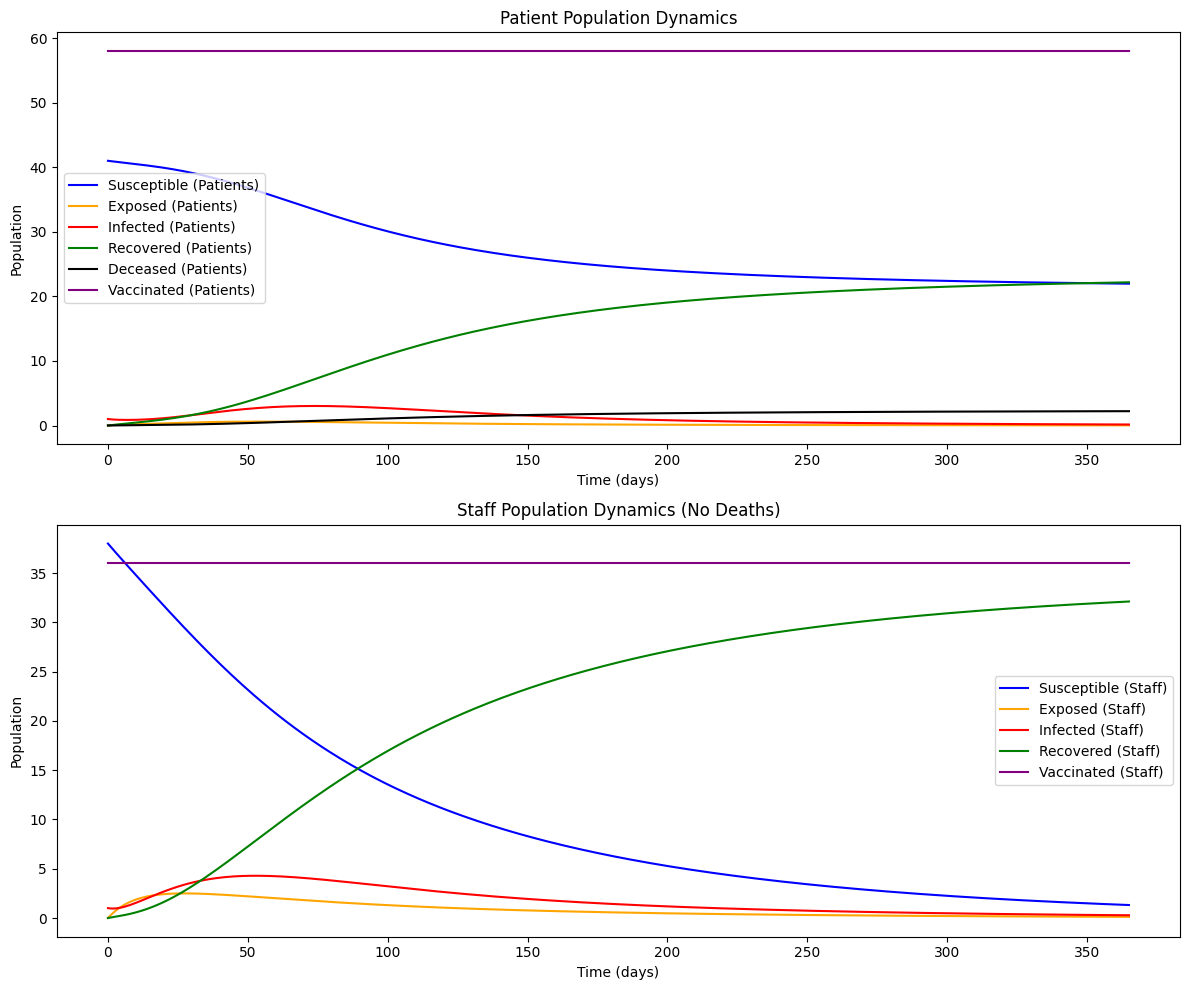

   Time        S_p       E_p       I_p       R_p       D_p   V_p        S_s  \
0   0.0  41.000000  0.000000  1.000000  0.000000  0.000000  58.0  38.000000   
1   1.0  40.944834  0.045690  0.953599  0.048772  0.004877  58.0  37.669662   
2   2.0  40.891902  0.078313  0.920966  0.095588  0.009559  58.0  37.342871   
3   3.0  40.840497  0.102278  0.898238  0.141033  0.014103  58.0  37.018949   
4   4.0  40.790101  0.120672  0.882839  0.185534  0.018553  58.0  36.697347   

        E_s       I_s       R_s   V_s  
0  0.000000  1.000000  0.000000  36.0  
1  0.294586  0.965980  0.049020  36.0  
2  0.558396  0.960813  0.097079  36.0  
3  0.794522  0.980246  0.145511  36.0  
4  1.005728  1.020516  0.195450  36.0  


In [4]:
# Social distancing, vaccination

# Define the system of differential equations for the extended SEIR model
def seir_model(y, t, beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s):
    S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = y
    
    # Differential equations for patients and staff with deaths and vaccinations
    dS_p = -beta_p_u * S_p * I_s / N_p - beta_s_u * S_p * I_p / N_p - beta_pp_u * S_p * I_p / N_p - nu_p * S_p
    dE_p = beta_pp_u * S_p * I_s / N_p + beta_s_u * S_p * I_p / N_p - sigma_p * E_p
    dI_p = sigma_p * E_p - gamma_p * I_p - delta_p * I_p
    dR_p = gamma_p * I_p
    dD_p = delta_p * I_p  # Deaths from infection (patients)
    dV_p = nu_p * S_p  # Vaccination rate
    
    dS_s = -beta_p_u * S_s * I_p / N_s - beta_s_u * S_s * I_s / N_s - beta_ss_u * S_s * I_p / N_s - nu_s * S_s - lambda_ext_u * S_s
    dE_s = beta_p_u * S_s * I_p / N_s + beta_ss_u * S_s * I_s / N_s - sigma_s * E_s + lambda_ext_u * S_s
    dI_s = sigma_s * E_s - gamma_s * I_s
    dR_s = gamma_s * I_s
    dV_s = nu_s * S_s  # Vaccination rate
    
    # Return the derivatives as a list
    return [dS_p, dE_p, dI_p, dR_p, dD_p, dV_p, dS_s, dE_s, dI_s, dR_s, dV_s]

# Initial conditions (number of individuals in each compartment)
S_p0 = 41  # Initial susceptible patients
E_p0 = 0    # Initial exposed patients
I_p0 = 1    # Initial infected patients
R_p0 = 0    # Initial recovered patients
D_p0 = 0    # Initial deceased patients
V_p0 = 58    # Initial vaccinated patients

S_s0 = 38   # Initial susceptible staff
E_s0 = 0    # Initial exposed staff
I_s0 = 1    # Initial infected staff
R_s0 = 0    # Initial recovered staff
V_s0 = 36    # Initial vaccinated staff

# Combine the initial conditions into a vector
y0 = [S_p0, E_p0, I_p0, R_p0, D_p0, V_p0, S_s0, E_s0, I_s0, R_s0, V_s0]

# Parameters
beta_p = 0.03  # Infection rate from patients to staff
beta_s = 0.07  # Infection rate from staff to patients
beta_pp = 0.15 # patient-to-patient
beta_ss = 0.04 # staff-to-staff
gamma_p = 0.05  # Recovery rate for patients
gamma_s = 0.05  # Recovery rate for staff
sigma_p = 0.3  # Rate of transition from exposed to infected (patients)
sigma_s = 0.1  # Rate of transition from exposed to infected (staff)
lambda_ext = 0.04  #External rate of transition from exposed to infected
delta_p = 0.005  # Death rate for patients (e.g., 1% of infected patients die)
nu_p = 0.00  # Vaccination rate for patients (5% of susceptible patients get vaccinated per day)
nu_s = 0.00  # Vaccination rate for staff (5% of susceptible staff get vaccinated per day)

#Control parameter to model social distancing/quarantine
u = 0.4
u_s = 0.8
beta_p_u = (1 - u_s) * beta_p
beta_s_u = (1 - u) * beta_s
beta_pp_u = (1 - u) * beta_pp
beta_ss_u = (1 - u_s) * beta_ss
lambda_ext_u = (1 - u_s) * lambda_ext

N_p = S_p0 + E_p0 + I_p0 + R_p0 + D_p0 + V_p0  # Total number of patients
N_s = S_s0 + E_s0 + I_s0 + R_s0 + V_s0  # Total number of staff

# Time points (from 0 to 100 days)
t = np.linspace(0, 365, 366)

# Solve the differential equations using odeint
result = odeint(seir_model, y0, t, args=(beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s))

# Extract the results
S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = result.T

# Plot the results
plt.figure(figsize=(12, 10))

# Plot for patients
plt.subplot(2, 1, 1)
plt.plot(t, S_p, label='Susceptible (Patients)', color='blue')
plt.plot(t, E_p, label='Exposed (Patients)', color='orange')
plt.plot(t, I_p, label='Infected (Patients)', color='red')
plt.plot(t, R_p, label='Recovered (Patients)', color='green')
plt.plot(t, D_p, label='Deceased (Patients)', color='black')
plt.plot(t, V_p, label='Vaccinated (Patients)', color='purple')
plt.title("Patient Population Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Plot for staff
plt.subplot(2, 1, 2)
plt.plot(t, S_s, label='Susceptible (Staff)', color='blue')
plt.plot(t, E_s, label='Exposed (Staff)', color='orange')
plt.plot(t, I_s, label='Infected (Staff)', color='red')
plt.plot(t, R_s, label='Recovered (Staff)', color='green')
plt.plot(t, V_s, label='Vaccinated (Staff)', color='purple')
plt.title("Staff Population Dynamics (No Deaths)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Show the plots
plt.tight_layout()
plt.savefig('seir_res_staff_sd_vacc.png')
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'S_p': S_p, 'E_p': E_p, 'I_p': I_p, 'R_p': R_p, 'D_p': D_p, 'V_p': V_p,  # Patient compartments
    'S_s': S_s, 'E_s': E_s, 'I_s': I_s, 'R_s': R_s, 'V_s': V_s  # Staff compartments
})

# Show the DataFrame
print(df.head())  # Show the first few rows to check the data

In [43]:
#Total numbers
print(f"Totals after 1 Year (Social Distancing, Vaccination):\n")

E_p = result[:, 1]
I_p = result[:, 2]
R_p = result[:, 3]
D_p = result[:, 4]
cumulative_infections_p = E_p + I_p + R_p + D_p
cum_p = cumulative_infections_p[-1]
print(f"Total Cumulative Patient Infections: {cum_p:.0f}")

E_s = result[:, 7]
I_s = result[:, 8]
R_s = result[:, 9]
cumulative_infections_s = E_s + I_s + R_s
cum_s = cumulative_infections_s[-1]
print(f"Total Cumulative Staff Infections: {cum_s:.0f}")

total_d = round(D_p[-1])
print(f"Total Deaths: {total_d}")

total_r_p = round(R_p[-1])
print(f"Total Patient Recoveries: {total_r_p}")

total_r_s = round(R_s[-1])
print(f"Total Staff Recoveries: {total_r_s}")

total_v_p = round(V_p[-1])
print(f"Total Patient Vaccinations: {total_v_p}")

total_v_s = round(V_s[-1])
print(f"Total Staff Vaccinations: {total_v_s}")

Totals after 1 Year (Social Distancing, Vaccination):

Total Cumulative Patient Infections: 25
Total Cumulative Staff Infections: 33
Total Deaths: 2
Total Patient Recoveries: 22
Total Staff Recoveries: 32
Total Patient Vaccinations: 58
Total Staff Vaccinations: 36


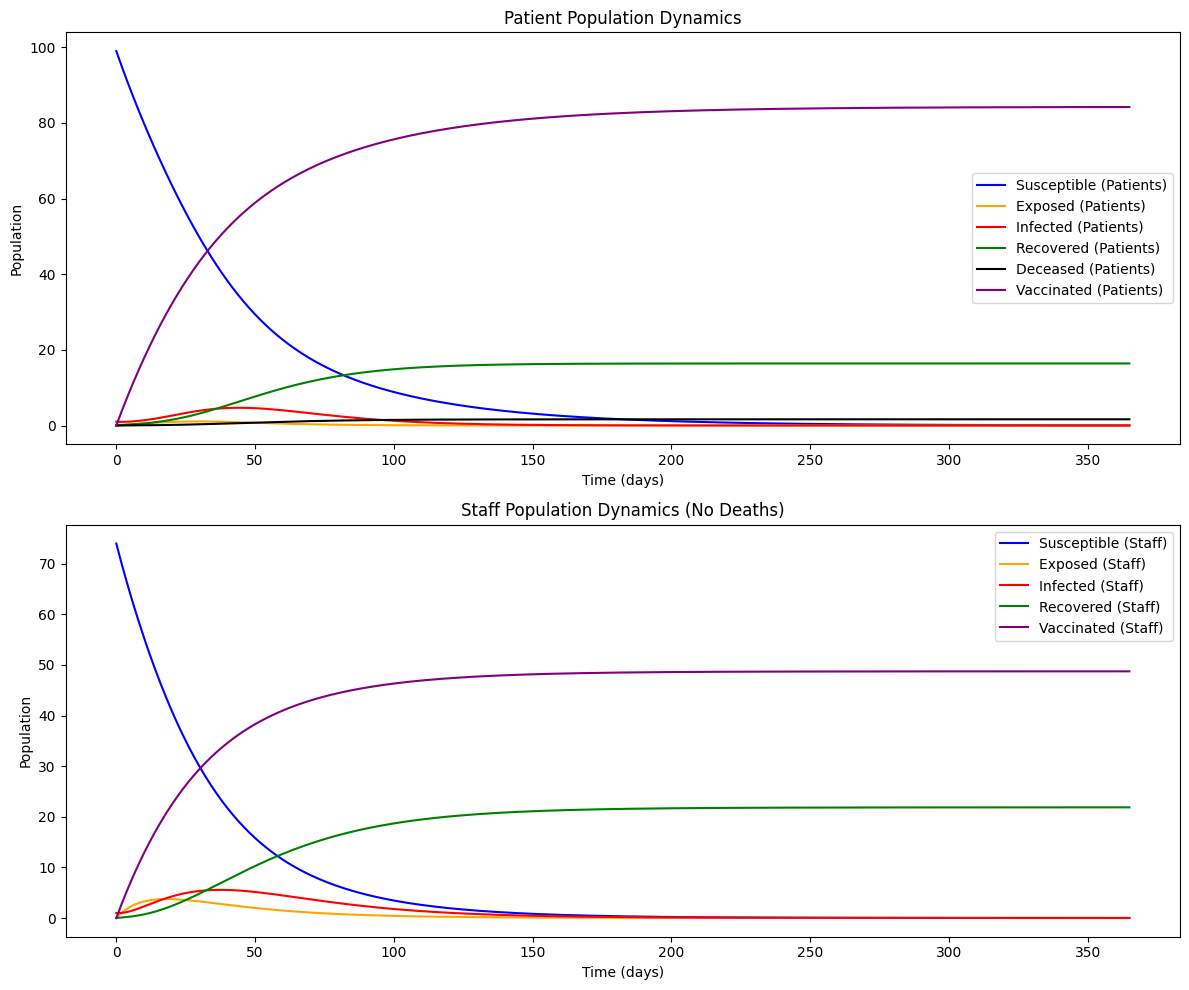

   Time        S_p       E_p       I_p       R_p       D_p       V_p  \
0   0.0  99.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
1   1.0  96.908633  0.109692  0.963584  0.048945  0.004894  1.959004   
2   2.0  94.864034  0.188544  0.956228  0.096840  0.009684  3.876657   
3   3.0  92.861845  0.248933  0.969321  0.144906  0.014491  5.753848   
4   4.0  90.898872  0.298919  0.997653  0.194025  0.019402  7.591392   

         S_s       E_s       I_s       R_s       V_s  
0  74.000000  0.000000  1.000000  0.000000  0.000000  
1  71.903916  0.567937  0.979763  0.049253  1.458937  
2  69.867205  1.065682  1.012392  0.098857  2.876552  
3  67.886040  1.500830  1.088845  0.151222  4.253995  
4  65.957285  1.880094  1.201214  0.208339  5.592343  


In [5]:
# Social distancing, increased vaccination

# Define the system of differential equations for the extended SEIR model
def seir_model(y, t, beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s):
    S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = y
    
    # Differential equations for patients and staff with deaths and vaccinations
    dS_p = -beta_p_u * S_p * I_s / N_p - beta_s_u * S_p * I_p / N_p - beta_pp_u * S_p * I_p / N_p - nu_p * S_p
    dE_p = beta_pp_u * S_p * I_s / N_p + beta_s_u * S_p * I_p / N_p - sigma_p * E_p
    dI_p = sigma_p * E_p - gamma_p * I_p - delta_p * I_p
    dR_p = gamma_p * I_p
    dD_p = delta_p * I_p  # Deaths from infection (patients)
    dV_p = nu_p * S_p  # Vaccination rate
    
    dS_s = -beta_p_u * S_s * I_p / N_s - beta_s_u * S_s * I_s / N_s - beta_ss_u * S_s * I_p / N_s - nu_s * S_s - lambda_ext_u * S_s
    dE_s = beta_p_u * S_s * I_p / N_s + beta_ss_u * S_s * I_s / N_s - sigma_s * E_s + lambda_ext_u * S_s
    dI_s = sigma_s * E_s - gamma_s * I_s
    dR_s = gamma_s * I_s
    dV_s = nu_s * S_s  # Vaccination rate
    
    # Return the derivatives as a list
    return [dS_p, dE_p, dI_p, dR_p, dD_p, dV_p, dS_s, dE_s, dI_s, dR_s, dV_s]

# Initial conditions (number of individuals in each compartment)
S_p0 = 41+58  # Initial susceptible patients
E_p0 = 0    # Initial exposed patients
I_p0 = 1    # Initial infected patients
R_p0 = 0    # Initial recovered patients
D_p0 = 0    # Initial deceased patients
V_p0 = 0    # Initial vaccinated patients

S_s0 = 38+36   # Initial susceptible staff
E_s0 = 0    # Initial exposed staff
I_s0 = 1    # Initial infected staff
R_s0 = 0    # Initial recovered staff
V_s0 = 0    # Initial vaccinated staff

# Combine the initial conditions into a vector
y0 = [S_p0, E_p0, I_p0, R_p0, D_p0, V_p0, S_s0, E_s0, I_s0, R_s0, V_s0]

# Parameters
beta_p = 0.03  # Infection rate from patients to staff
beta_s = 0.07  # Infection rate from staff to patients
beta_pp = 0.15 # patient-to-patient
beta_ss = 0.04 # staff-to-staff
gamma_p = 0.05  # Recovery rate for patients
gamma_s = 0.05  # Recovery rate for staff
sigma_p = 0.3  # Rate of transition from exposed to infected (patients)
sigma_s = 0.1  # Rate of transition from exposed to infected (staff)
lambda_ext = 0.04  #External rate of transition from exposed to infected
delta_p = 0.005  # Death rate for patients (e.g., 1% of infected patients die)
nu_p = 0.02  # Vaccination rate for patients (5% of susceptible patients get vaccinated per day)
nu_s = 0.02  # Vaccination rate for staff (5% of susceptible staff get vaccinated per day)

#Control parameter to model social distancing/quarantine
u = 0.4
u_s = 0.8
beta_p_u = (1 - u_s) * beta_p
beta_s_u = (1 - u) * beta_s
beta_pp_u = (1 - u) * beta_pp
beta_ss_u = (1 - u_s) * beta_ss
lambda_ext_u = (1 - u_s) * lambda_ext

N_p = S_p0 + E_p0 + I_p0 + R_p0 + D_p0 + V_p0  # Total number of patients
N_s = S_s0 + E_s0 + I_s0 + R_s0 + V_s0  # Total number of staff

# Time points (from 0 to 100 days)
t = np.linspace(0, 365, 366)

# Solve the differential equations using odeint
result = odeint(seir_model, y0, t, args=(beta_p_u, beta_s_u, beta_pp_u, beta_ss_u, gamma_p, gamma_s, sigma_p, sigma_s, lambda_ext_u, delta_p, nu_p, nu_s, N_p, N_s))

# Extract the results
S_p, E_p, I_p, R_p, D_p, V_p, S_s, E_s, I_s, R_s, V_s = result.T

# Plot the results
plt.figure(figsize=(12, 10))

# Plot for patients
plt.subplot(2, 1, 1)
plt.plot(t, S_p, label='Susceptible (Patients)', color='blue')
plt.plot(t, E_p, label='Exposed (Patients)', color='orange')
plt.plot(t, I_p, label='Infected (Patients)', color='red')
plt.plot(t, R_p, label='Recovered (Patients)', color='green')
plt.plot(t, D_p, label='Deceased (Patients)', color='black')
plt.plot(t, V_p, label='Vaccinated (Patients)', color='purple')
plt.title("Patient Population Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Plot for staff
plt.subplot(2, 1, 2)
plt.plot(t, S_s, label='Susceptible (Staff)', color='blue')
plt.plot(t, E_s, label='Exposed (Staff)', color='orange')
plt.plot(t, I_s, label='Infected (Staff)', color='red')
plt.plot(t, R_s, label='Recovered (Staff)', color='green')
plt.plot(t, V_s, label='Vaccinated (Staff)', color='purple')
plt.title("Staff Population Dynamics (No Deaths)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()

# Show the plots
plt.tight_layout()
plt.savefig('seir_res_staff_sd_up_vacc.png')
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'S_p': S_p, 'E_p': E_p, 'I_p': I_p, 'R_p': R_p, 'D_p': D_p, 'V_p': V_p,  # Patient compartments
    'S_s': S_s, 'E_s': E_s, 'I_s': I_s, 'R_s': R_s, 'V_s': V_s  # Staff compartments
})

# Show the DataFrame
print(df.head())  # Show the first few rows to check the data

In [6]:
#Total numbers
print(f"Totals after 1 Year (Social Distancing, Increased Vaccination):\n")

E_p = result[:, 1]
I_p = result[:, 2]
R_p = result[:, 3]
D_p = result[:, 4]
cumulative_infections_p = E_p + I_p + R_p + D_p
cum_p = cumulative_infections_p[-1]
print(f"Total Cumulative Patient Infections: {cum_p:.0f}")

E_s = result[:, 7]
I_s = result[:, 8]
R_s = result[:, 9]
cumulative_infections_s = E_s + I_s + R_s
cum_s = cumulative_infections_s[-1]
print(f"Total Cumulative Staff Infections: {cum_s:.0f}")

total_d = round(D_p[-1])
print(f"Total Deaths: {total_d}")

total_r_p = round(R_p[-1])
print(f"Total Patient Recoveries: {total_r_p}")

total_r_s = round(R_s[-1])
print(f"Total Staff Recoveries: {total_r_s}")

total_v_p = round(V_p[-1])
print(f"Total Patient Vaccinations: {total_v_p}")

total_v_s = round(V_s[-1])
print(f"Total Staff Vaccinations: {total_v_s}")

Totals after 1 Year (Social Distancing, Increased Vaccination):

Total Cumulative Patient Infections: 18
Total Cumulative Staff Infections: 22
Total Deaths: 2
Total Patient Recoveries: 16
Total Staff Recoveries: 22
Total Patient Vaccinations: 84
Total Staff Vaccinations: 49
